In [1]:
# Librerías
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.model_selection import train_test_split
from typing import Union

In [10]:
ruta_archivo_csv = '../bases de datos/iris.csv'

# Carga los datos desde el archivo CSV en un DataFrame
datos = pd.read_csv(ruta_archivo_csv, sep=';')
display(datos.info())
datos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [11]:
# Mapeo de categorías a números
mapeo = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Aplicar el mapeo a la columna 'Categorias'
datos['Species'] = datos['Species'].map(mapeo)

In [13]:
datos.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Descripcion basica de estadística

In [15]:
datos.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


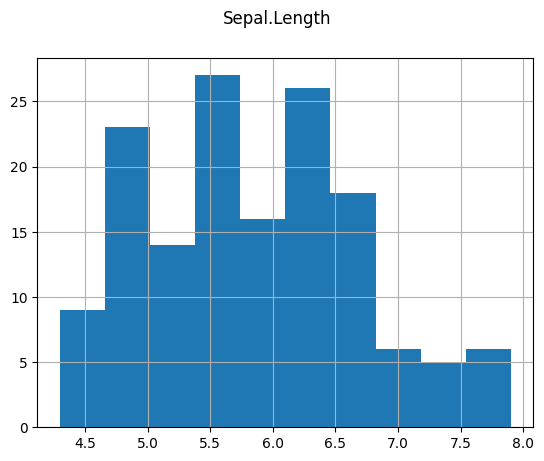

In [27]:
col = "Sepal.Length"
datos[col].hist()
plt.suptitle(col)
plt.show()

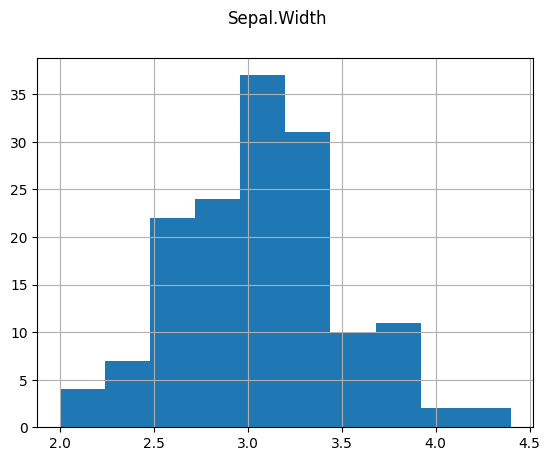

In [19]:
col = "Sepal.Width"
datos[col].hist()
plt.suptitle(col)
plt.show()

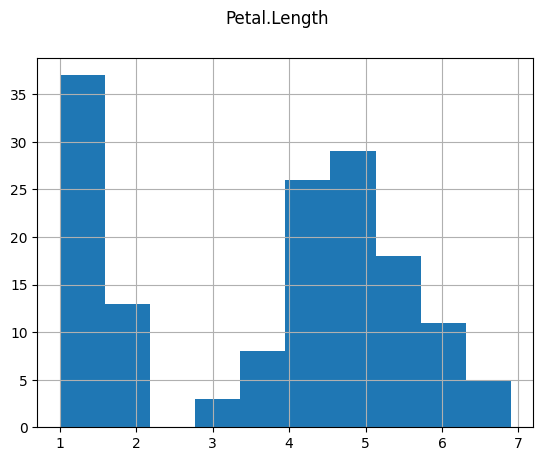

In [20]:
col = "Petal.Length"
datos[col].hist()
plt.suptitle(col)
plt.show()

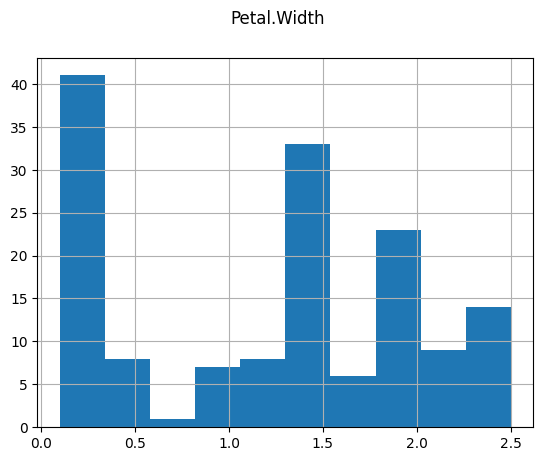

In [22]:
col = "Petal.Width"
datos[col].hist()
plt.suptitle(col)
plt.show()

# Relasion entre  las variables con la Species

In [28]:
datos["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [32]:
#Creando la columna que se elimino
datos["NameSpecie"]=datos["Species"].map({0: 'setosa', 1: 'versicolor', 2 : 'virginica'})

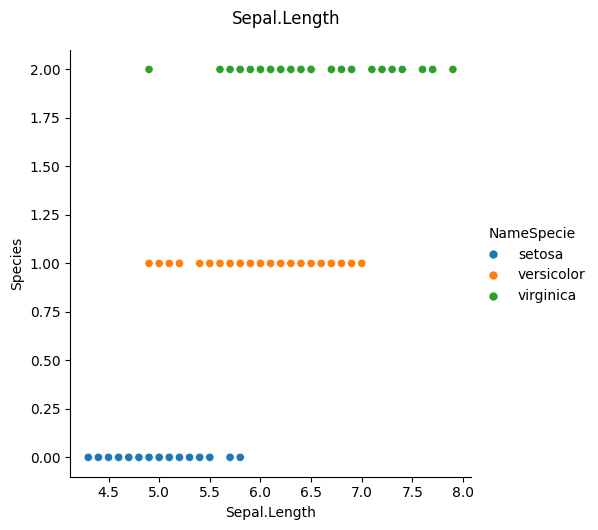

In [38]:
col = "Sepal.Length"
sns.relplot(x=col, y="Species", hue="NameSpecie", data=datos)
plt.suptitle(col, y=1.05)
plt.show()

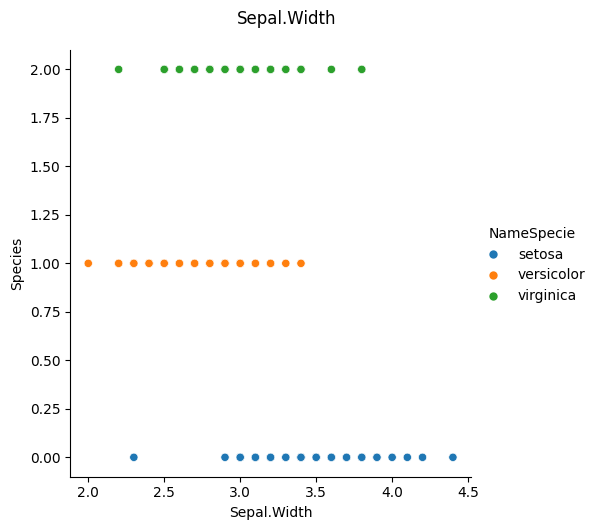

In [40]:
col = "Sepal.Width"
sns.relplot(x=col, y="Species", hue="NameSpecie", data=datos)
plt.suptitle(col, y=1.05)
plt.show()

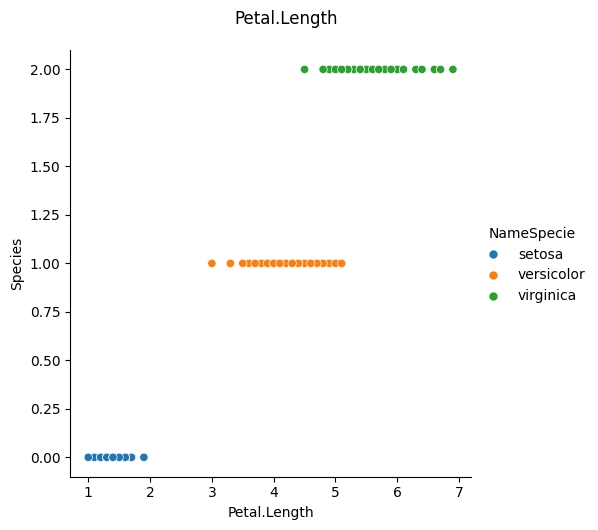

In [39]:
col = "Petal.Length"
sns.relplot(x=col, y="Species", hue="NameSpecie", data=datos)
plt.suptitle(col, y=1.05)
plt.show()

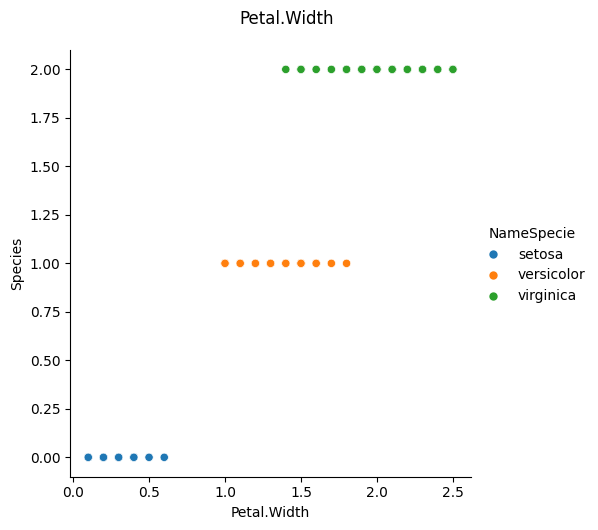

In [41]:
col = "Petal.Width"
sns.relplot(x=col, y="Species", hue="NameSpecie", data=datos)
plt.suptitle(col, y=1.05)
plt.show()

# Analisis Exploratorio de datos

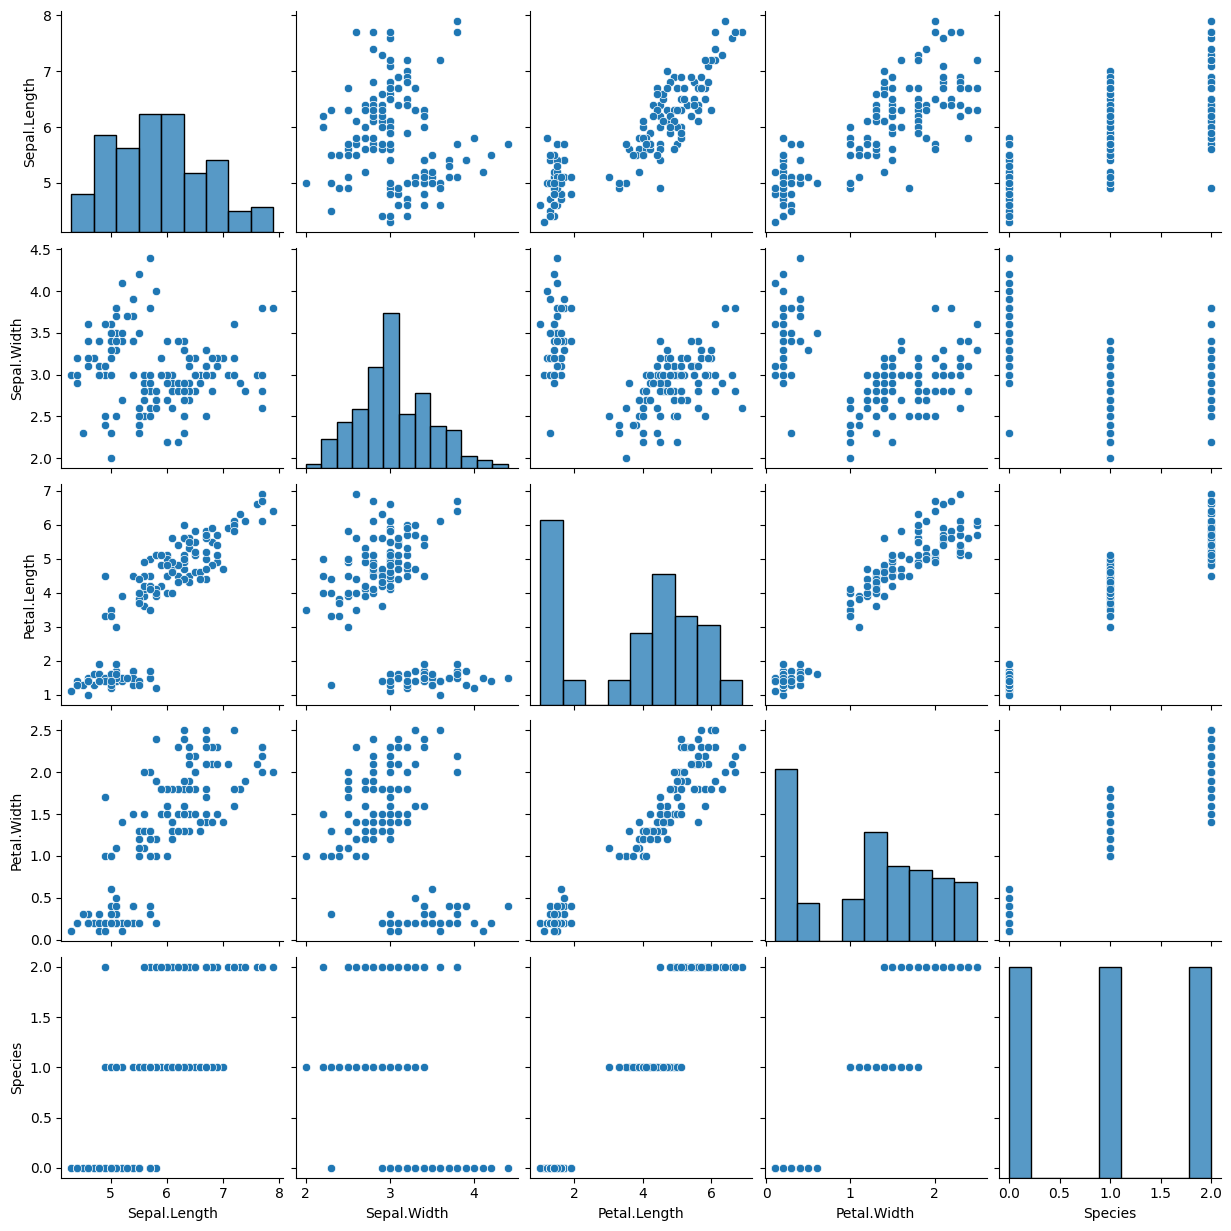

In [44]:
sns.pairplot(datos)

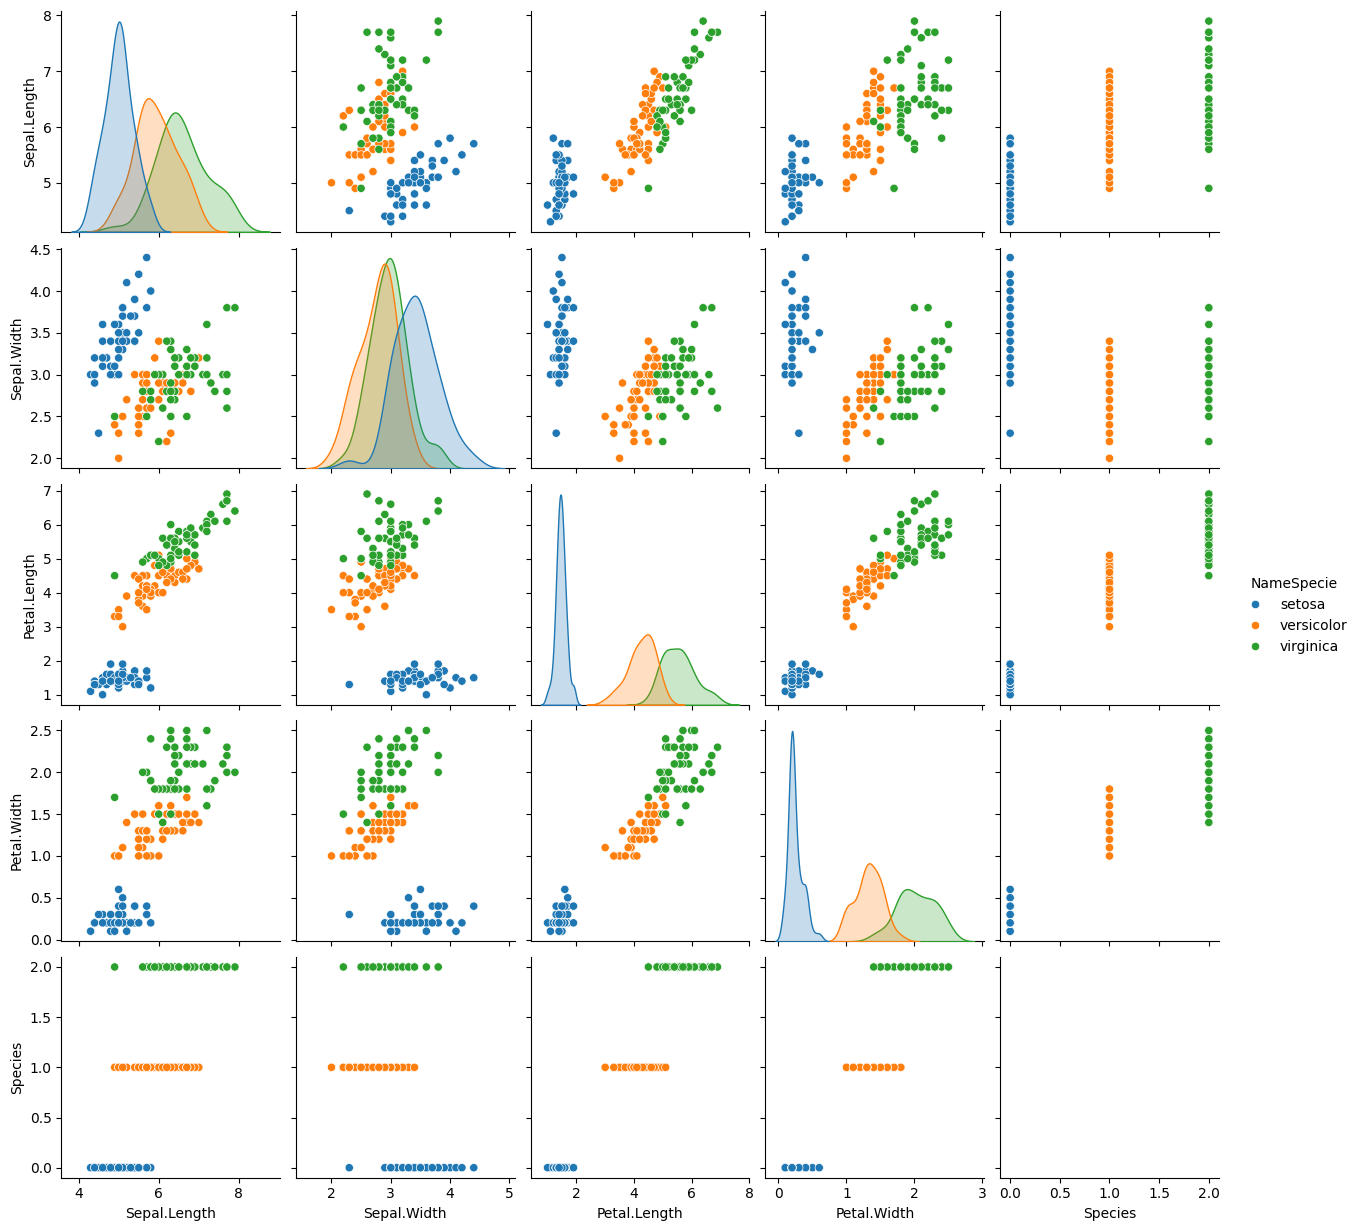

In [43]:
sns.pairplot(datos, hue="NameSpecie")

# Creación del modelo (train test split)

In [47]:
datos_train, datos_test = train_test_split(datos, test_size=0.25)

In [48]:
datos_train.shape

(112, 6)

In [49]:
datos_test.shape

(38, 6)

In [50]:
datos_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,NameSpecie
26,5.0,3.4,1.6,0.4,0,setosa
16,5.4,3.9,1.3,0.4,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa
133,6.3,2.8,5.1,1.5,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica


# Preparando nuestros datos pra el modelo
Esto implica volver a dividir los datos en matrices con NumPy

In [51]:
X_train = datos_train.drop(columns=["Species","NameSpecie"]).values
y_train =  datos_train["Species"].values

In [53]:
X_train.shape

(112, 4)

# Cual es nuestra línea de base 
¿Cuál es el modela más simple que podemos pensar en este caso? Si nuestro modelo de referencia es simplemente adivinar especies de flores al azar o adivinando una sola especie para cada punto de datos, eperaríamos tener una precisión del modelo de 0.33, ya que tenemos tres clase diferentes que están equilibradas de manera uniforme, por lo que 

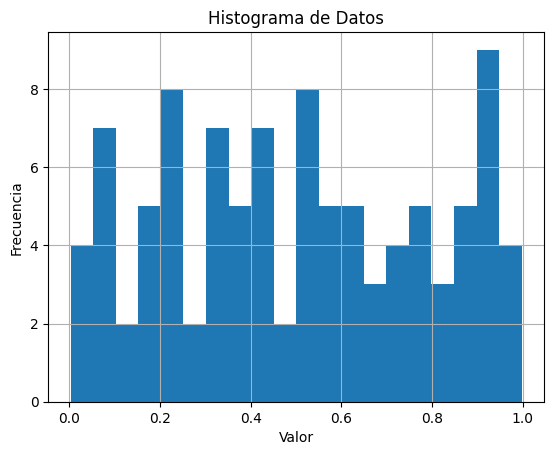

In [55]:
# Generar 100 datos aleatorios entre 0 y 1
datos2 = np.random.rand(100)

# Crear un DataFrame con los datos
df = pd.DataFrame({'datos': datos2})

# Crear el histograma utilizando Pandas
df['datos'].hist(bins=20)  # Puedes ajustar el número de bins según tu preferencia
plt.title('Histograma de Datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

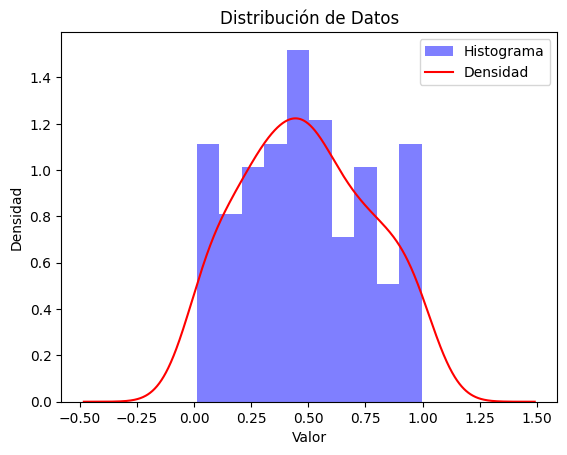

In [57]:
# Generar 100 datos aleatorios entre 0 y 1
datos = np.random.rand(100)

# Crear un DataFrame con los datos
df = pd.DataFrame({'datos': datos})

# Crear el histograma
df['datos'].hist(density=True, bins=10, alpha=0.5, color='blue', label='Histograma')

# Crear el gráfico de densidad
df['datos'].plot(kind='kde', color='red', label='Densidad')

# Añadir título y etiquetas
plt.title('Distribución de Datos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [62]:
# Datos de alturas de plantas en cm
alturas = np.array([10, 10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 40])

# Pruebas de normalidad
shapiro_test = stats.shapiro(alturas)
ks_test = stats.kstest(alturas, 'norm')
anderson_test = stats.anderson(alturas, 'norm')

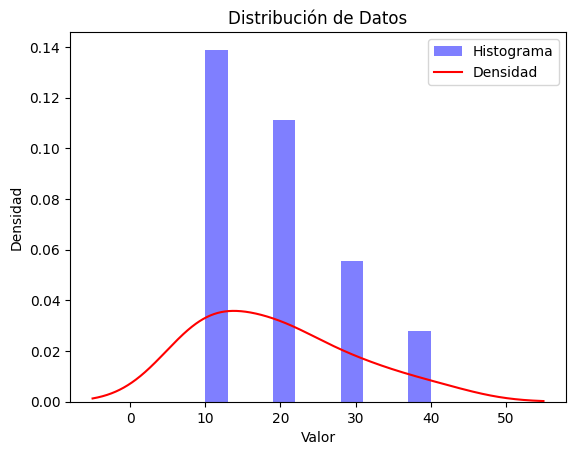

In [69]:

# Crear un DataFrame con los datos
df = pd.DataFrame({'alturas': alturas})

# Crear el histograma
df['alturas'].hist(density=True, bins=10, alpha=0.5, color='blue', label='Histograma')

# Crear el gráfico de densidad
df['alturas'].plot(kind='kde', color='red', label='Densidad')

# Añadir título y etiquetas
plt.title('Distribución de Datos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [63]:
print("Prueba de Shapiro-Wilk:")
print("Estadístico:", shapiro_test.statistic)
print("p-valor:", shapiro_test.pvalue)
print()

Prueba de Shapiro-Wilk:
Estadístico: 0.8397852182388306
p-valor: 0.027521446347236633



In [64]:
print("Prueba de Kolmogorov-Smirnov:")
print("Estadístico:", ks_test.statistic)
print("p-valor:", ks_test.pvalue)
print()

Prueba de Kolmogorov-Smirnov:
Estadístico: 1.0
p-valor: 0.0



In [65]:
print("Prueba de Anderson-Darling:")
print("Estadístico:", anderson_test.statistic)
print("Valores críticos:", anderson_test.critical_values)
print()

Prueba de Anderson-Darling:
Estadístico: 0.803876501087764
Valores críticos: [0.497 0.566 0.679 0.792 0.942]



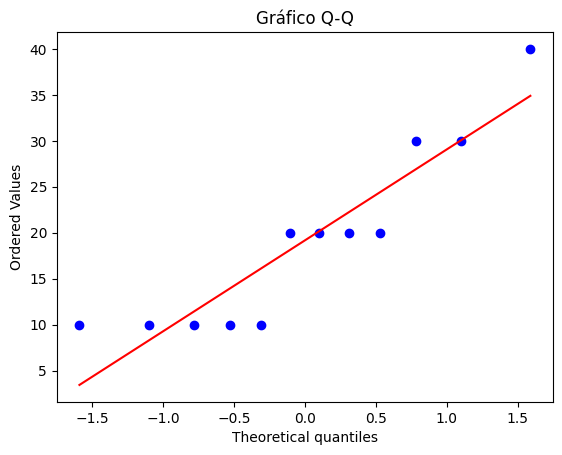

In [66]:
# Comparación de cuantiles
stats.probplot(alturas, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

In [67]:
# Examen de la media y la desviación estándar
media = np.mean(alturas)
desviacion_estandar = np.std(alturas)

print("Media de las alturas:", media)
print("Desviación estándar de las alturas:", desviacion_estandar)
print()

Media de las alturas: 19.166666666666668
Desviación estándar de las alturas: 9.537935951882996



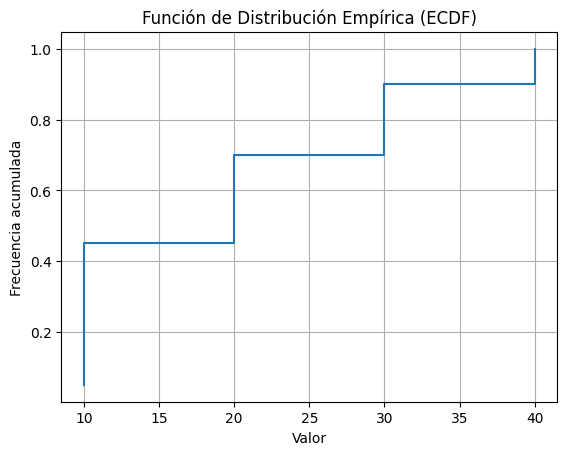

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes un conjunto de datos llamado 'datos'
datos = np.array([10,10,10,10,10,10,10,10,10,20,20,20,20,20,30,30,30,30,40,40])

# Ordena los datos de forma ascendente
datos_ordenados = np.sort(datos)

# Calcula las frecuencias relativas acumuladas
n = len(datos_ordenados)
frecuencias_acumuladas = np.arange(1, n + 1) / n

# Grafica la ECDF
plt.step(datos_ordenados, frecuencias_acumuladas, where='post')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia acumulada')
plt.title('Función de Distribución Empírica (ECDF)')

# Muestra la gráfica
plt.grid(True)
plt.show()